# Курсовая работа

## Проделаная работа:
1. начал читать книгу
2. Написал НС для распознования цифр
3. Нашел базу данных Cedar
4. Посчитал средний размер изображений в базе
5. Написал скрипт обработки изображений
6. написал парсер данных в НС
7. Запустил 2 с данными из 6
8. НС обучается в обратную сторону(Прям как я)
9. Удалил курсовую работу
10. Создал этот файл

## Обработка изображения:

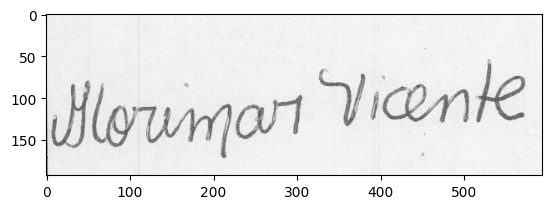

In [2]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# Расчет порога бинаризации методом Оцу 
def otsy(img):
    bins_num = 256
    hist, bins_edges = np.histogram(img, bins_num)    # построение гистограммы значений пикселей
    bin_mids = (bins_edges[:-1] + bins_edges[1:]) / 2 # Нахождение центра каждого отрезка
    # Итерация по массиву и нахождение вероятностей каждого значения пикселя
    weight1 = np.cumsum(hist)
    weight2 = np.cumsum(hist[::-1])[::-1]
    mean1 = np.cumsum(hist * bin_mids) / weight1
    mean2 = (np.cumsum((hist * bin_mids)[::-1]) / weight2[::-1])[::-1]

    inter_class_variance = weight1[:-1] * weight2[1:] * (mean1[:-1] - mean2[1:]) ** 2
    index_of_max_val = np.argmax(inter_class_variance)
    threshold = bin_mids[:-1][index_of_max_val]
    return threshold

nX = 300
nY = 150
right_ratio = nX/nY

file_name = "test.png"
original_img = cv.imread(file_name)

#Show the image with matplotlib
plt.imshow(original_img)
plt.show()


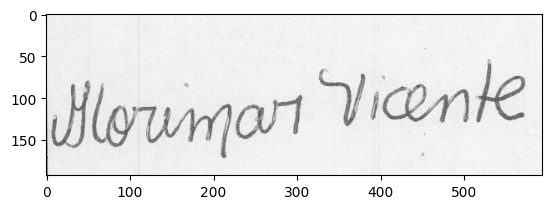

In [3]:
# Преобразование в полу-тоновое
gray_img = cv.cvtColor(original_img, cv.COLOR_RGB2GRAY)

show_img = cv.cvtColor(gray_img, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()

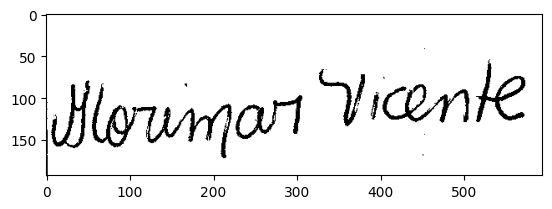

In [4]:
T = otsy(gray_img) # Нахождение порога бтнаризации методом Оцу
ret, bin_img = cv.threshold(gray_img, T, 255, 0) # Бинаризация

show_img = cv.cvtColor(bin_img, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()

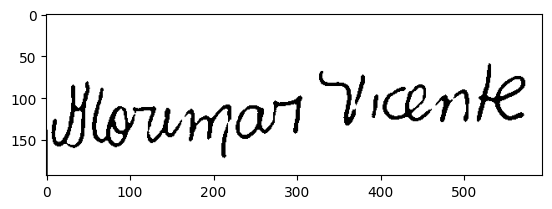

In [5]:
median = cv.medianBlur(bin_img, 5) # Медианная фильтрация масокй 5х5

show_img = cv.cvtColor(median, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()

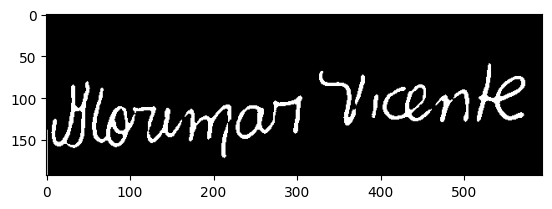

In [6]:
non_median = cv.bitwise_not(median) # Инвертирование

show_img = cv.cvtColor(non_median, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()

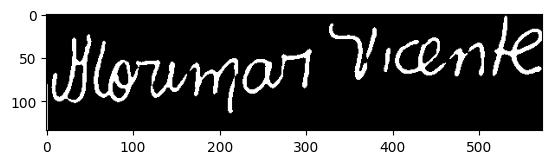

In [7]:
non_zero = np.nonzero(non_median)
img = non_median[min(non_zero[0]):max(non_zero[0]), min(non_zero[1]):max(non_zero[1])]

show_img = cv.cvtColor(img, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()

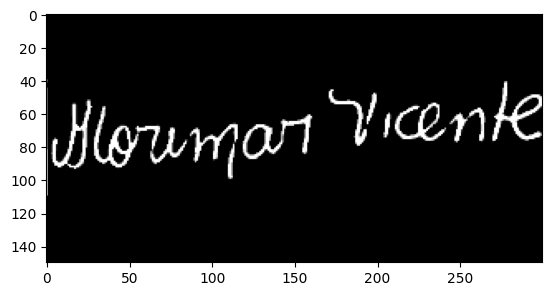

In [8]:
Y, X = np.shape(img)
current_ratio = X / Y
if current_ratio == right_ratio:
    final = cv.resize(img, (nX, nY))
elif current_ratio > right_ratio:
    final = cv.resize(img, (nX, int(Y * (nX/X))))
    missing = nY - int(Y * (nX/X))
    if missing % 2 == 0:
        top = bottom = missing // 2
    else:
        top = missing // 2
        bottom = top + 1
    final = cv.copyMakeBorder(final, top, bottom, 0, 0, cv.BORDER_CONSTANT, None, value = 0)
else:
    final = cv.resize(img, (int(X * (nY/Y)), nY))
    missing = nX - int(X * (nY/Y))
    if missing % 2 == 0:
        left = right = missing // 2
    else:
        left = missing // 2
        right = left + 1
    final = cv.copyMakeBorder(final, 0, 0, left, right, cv.BORDER_CONSTANT, None, value = 0)

# cv.imwrite("final.png", final)
show_img = cv.cvtColor(final, cv.COLOR_GRAY2RGB)
plt.imshow(show_img)
plt.show()